In [37]:
# Import SQLAlchemy and other dependencies 
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import pandas as pd
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
import numpy as np

In [38]:
# Create engine using the `hawaii.sqlite` database file created in database_engineering steps

engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [39]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [40]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [41]:
# Print all of the classes mapped to the Base

Base.classes.keys()

# Reflect Database into ORM class
Station = Base.classes.station
Measurements = Base.classes.measurement

In [42]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [43]:
# Start a session to query the database
session = Session(engine)

In [44]:
#Grab last date 
data = pd.read_sql("SELECT * FROM measurement", conn)
data.tail()

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


In [45]:
# to get the last 12 months of data, last date - 365
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [46]:
# query to pull the last year of precipitation data
rain = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > last_year).\
    order_by(Measurements.date).all()

In [47]:
# Load the data from the query into a dataframe

prec_df = pd.DataFrame(rain)
prec_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [48]:
# reset the index to the date

prec_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


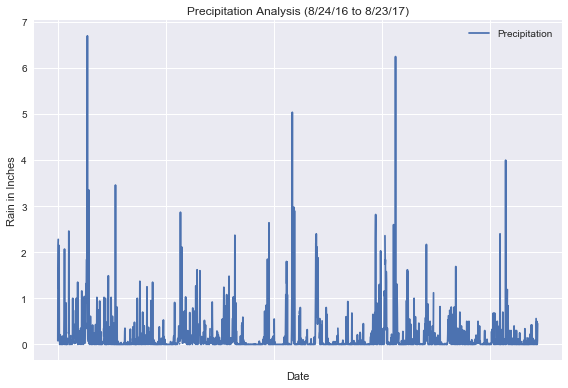

In [49]:
# plot the dataframe
prec_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
#Use pandas to describe 
prec_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [51]:
# Count the number of stations in the Measurement table
locations = session.query(Measurements).group_by(Measurements.station).count()
locations

9

In [52]:
# find the station with the most temperature observations, then list them all in descending order
active_station = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).\
               order_by(func.count(Measurements.tobs).desc()).all()
active = active_station[0][0]

In [53]:
# query to pull the last year of precipitation data for the busiest station
temperature = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    filter(Measurements.station == active).\
    filter(Measurements.date > last_year).\
    order_by(Measurements.date).all()

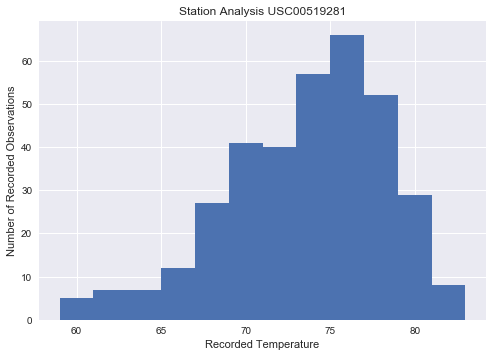

In [54]:
# plot the temperature data in a histogram with 12 bins
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis " + active)
plt.show()